In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as norm
import seaborn as sns
import scipy.stats as stats
import plotly.plotly as py
import plotly.graph_objs as go
import math
from plotly.tools import FigureFactory as FF
from scipy.stats.mstats import winsorize
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

KAG = pd.read_csv("KAG_conversion_data.csv")

KAG.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [2]:
KAG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


In [3]:
KAG.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

## Veri temizliği

In [4]:
KAG.isnull().sum()*100/KAG.shape[0]

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

## Aykırı Değer değerlendirmesi

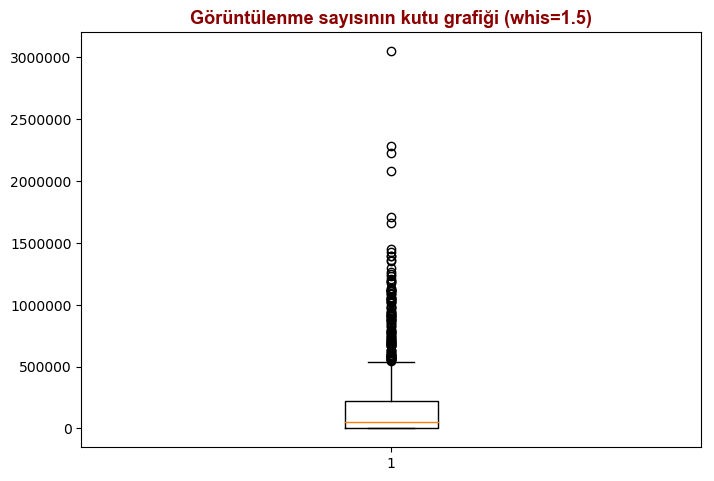

In [55]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG["Impressions"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

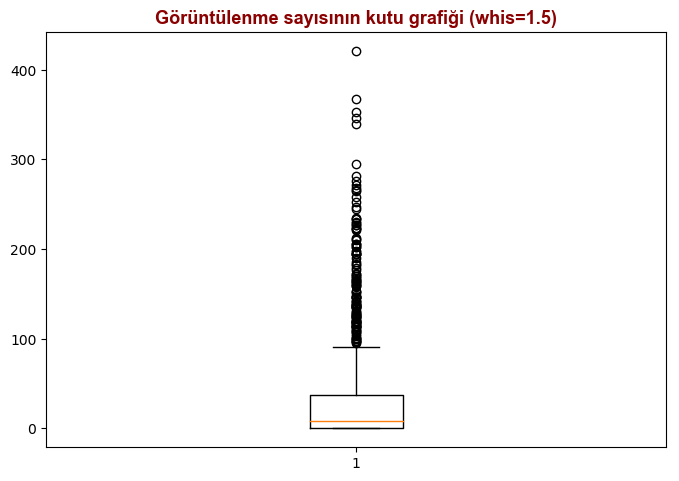

In [56]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG["Clicks"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

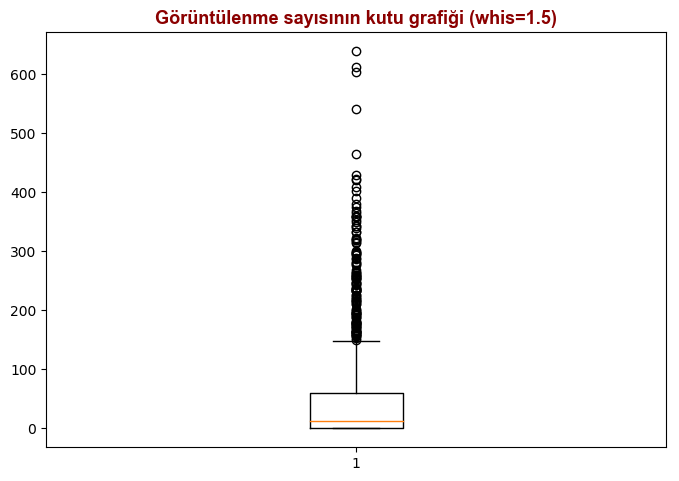

In [57]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG["Spent"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [58]:
#Aykırı deger olcmek için kullandıgım grafıklendırme de cok fazla uc degerler oldugu ıcın, log  ya da winsorize ile verisetini değiştirmeyi uygun gormedım.

In [5]:
## Object olan verileri int e ceviriyoruz
#age                    1143 non-null object
#gender                 1143 non-null object

In [6]:
KAG.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [7]:
for i in range(len(KAG)):
    if KAG['age'][i]=='30-34':
        KAG['age'][i]=int(3034)
    elif KAG['age'][i]=='35-39':
        KAG['age'][i]=int(3539)
    elif KAG['age'][i]=='40-44':
        KAG['age'][i]=int(4044)
    elif KAG['age'][i]=='45-49':
        KAG['age'][i]=int(4549)

In [8]:
for i in range(len(KAG)):
    if KAG['gender'][i]=='M':
        KAG['gender'][i]=1
    elif KAG['gender'][i]=='F':
        KAG['gender'][i]=2

In [9]:
KAG['APT']=round(KAG['Approved_Conversion']/KAG['Total_Conversion']*100,0)
KAG=KAG.dropna()
KAG_rel = KAG.drop(['ad_id','xyz_campaign_id','fb_campaign_id','Total_Conversion','Approved_Conversion'],axis=1)
KAG_rel=KAG_rel.dropna()

In [10]:
KAG.age.unique()

array([3034, 3539, 4044, 4549], dtype=object)

In [11]:
KAG_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1142
Data columns (total 7 columns):
age            1135 non-null object
gender         1135 non-null object
interest       1135 non-null int64
Impressions    1135 non-null int64
Clicks         1135 non-null int64
Spent          1135 non-null float64
APT            1135 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 70.9+ KB


In [12]:
KAG_rel.corr()

,interest,Impressions,Clicks,Spent,APT
interest,1.000000,0.101173,0.087926,0.069390,-0.023007
Impressions,0.101173,1.000000,0.948478,0.970358,-0.040766
Clicks,0.087926,0.948478,1.000000,0.992902,-0.051747
Spent,0.069390,0.970358,0.992902,1.000000,-0.048618
APT,-0.023007,-0.040766,-0.051747,-0.048618,1.000000


In [13]:
# Tablodan goruldugu uzere Impression,Clicks ve Spent birbiriyle ilişki olarak yuksek, 
# o yuzden pca ile 3 degeri 2 degere dusurecegım.

### xyz_campaign_id nin alabileceği 3 değeri groupby ile ayırarak 3 farklı veriseti olusturuyoruz.

In [14]:
KAG.astype({'age': 'int64','gender': 'int64'}).dtypes
KAG=KAG.drop(['ad_id'],axis=1)
KAG.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [15]:
# xyz_campaign_id=916 değeri için veriseti KAG_916 olarak tanımladım.
KAG_xyz=KAG.groupby('xyz_campaign_id')
KAG_916=KAG_xyz.get_group(916) 
KAG_916=KAG_916.drop(['xyz_campaign_id'],axis=1)
KAG_916.head()
KAG_916.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 10 columns):
fb_campaign_id         54 non-null int64
age                    54 non-null object
gender                 54 non-null object
interest               54 non-null int64
Impressions            54 non-null int64
Clicks                 54 non-null int64
Spent                  54 non-null float64
Total_Conversion       54 non-null int64
Approved_Conversion    54 non-null int64
APT                    54 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 4.6+ KB


In [16]:
# xyz_campaign_id=936 değeri için veriseti KAG_936 olarak tanımladım.
KAG_936=KAG_xyz.get_group(936) 
KAG_936=KAG_936.drop(['xyz_campaign_id'],axis=1)
KAG_936.head()
KAG_936.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 54 to 517
Data columns (total 10 columns):
fb_campaign_id         460 non-null int64
age                    460 non-null object
gender                 460 non-null object
interest               460 non-null int64
Impressions            460 non-null int64
Clicks                 460 non-null int64
Spent                  460 non-null float64
Total_Conversion       460 non-null int64
Approved_Conversion    460 non-null int64
APT                    460 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 39.5+ KB


In [17]:
# xyz_campaign_id=1178 değeri için veriseti KAG_1178 olarak tanımladım.
KAG_1178=KAG_xyz.get_group(1178) 
KAG_1178=KAG_1178.drop(['xyz_campaign_id'],axis=1)
KAG_1178.head()
KAG_1178.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 518 to 1142
Data columns (total 10 columns):
fb_campaign_id         621 non-null int64
age                    621 non-null object
gender                 621 non-null object
interest               621 non-null int64
Impressions            621 non-null int64
Clicks                 621 non-null int64
Spent                  621 non-null float64
Total_Conversion       621 non-null int64
Approved_Conversion    621 non-null int64
APT                    621 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 53.4+ KB


In [18]:
KAG_916 = KAG_916.drop(['Approved_Conversion','Total_Conversion'],axis=1)
KAG_936 = KAG_936.drop(['Approved_Conversion','Total_Conversion'],axis=1)
KAG_1178 = KAG_1178.drop(['Approved_Conversion','Total_Conversion'],axis=1)

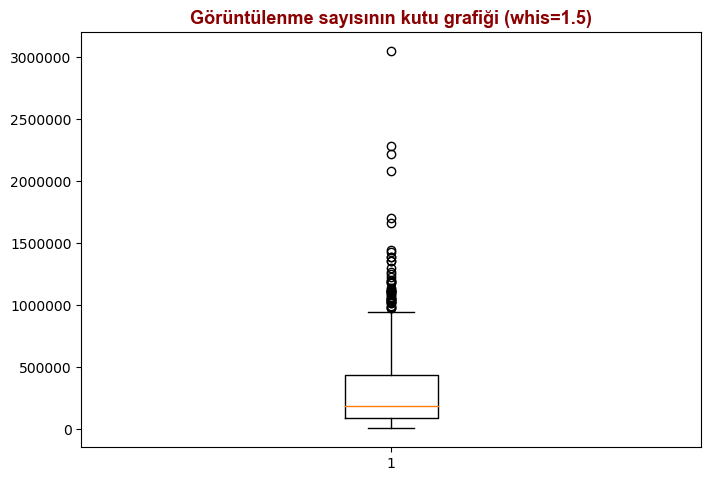

In [52]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG_1178["Impressions"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

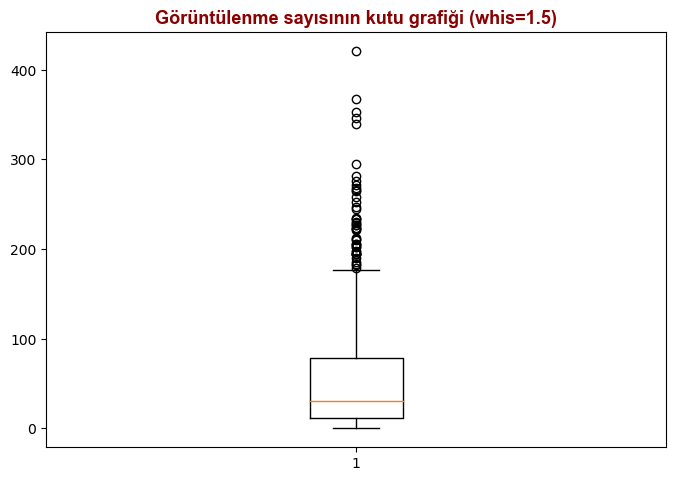

In [53]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG_1178["Clicks"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

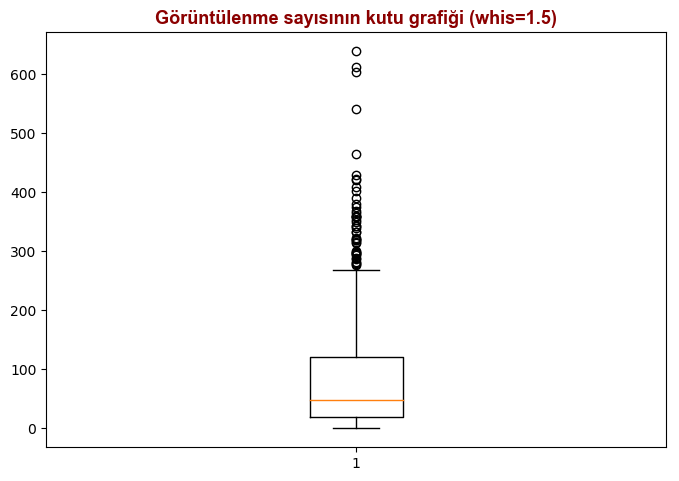

In [54]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(KAG_1178["Spent"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

### HISTOGRAM ve GRAFIKLER

(array([30.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0., 21.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

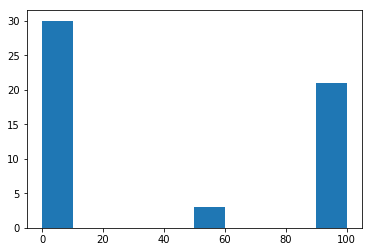

In [19]:
plt.hist(KAG_916.APT)

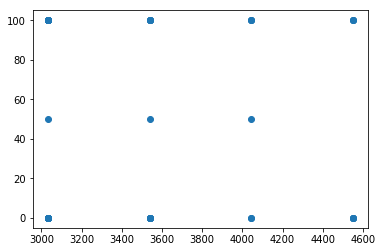

In [20]:
plt.scatter(KAG_916.age,KAG_916.APT)

(array([288.,   0.,   4.,   1.,   0.,  17.,   0.,   0.,   0., 150.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

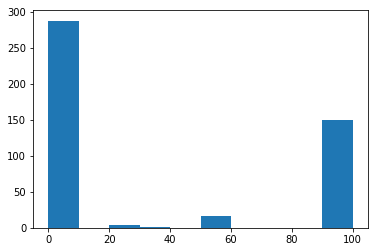

In [21]:
plt.hist(KAG_936.APT)

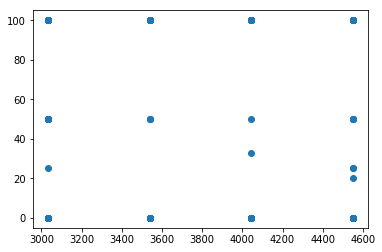

In [22]:
plt.scatter(KAG_936.age,KAG_936.APT)

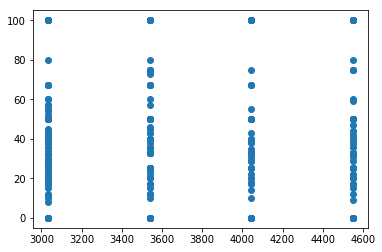

In [23]:
plt.scatter(KAG_1178.age,KAG_1178.APT)

(array([235.,  26.,  61.,  62.,  35.,  93.,  15.,   8.,   3.,  83.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

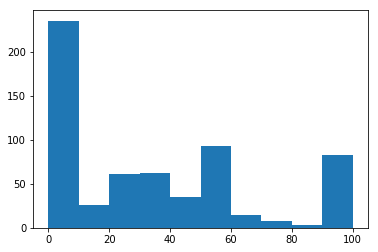

In [24]:
plt.hist(KAG_1178.APT)

### KAG_916 verisetinde kumeleme yontemlerı ve performansları

In [25]:
# Özellikle PCA ile birbiriyle yuksek ilişkili 3 ozellıgı 2 ye indirdim.
KAG_916_3 = KAG_916.drop(['fb_campaign_id','age','gender','interest','APT'],axis=1)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(KAG_916_3)
pccomp1=pca_components[:,0]
pccomp2=pca_components[:,1]
KAG_916_pca = KAG_916.drop(['Impressions','Clicks','Spent'],axis=1)
KAG_916_pca['pccomp1']=pccomp1
KAG_916_pca['pccomp2']=pccomp2

#### 1. KMEANS

In [26]:
KAG_916_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 7 columns):
fb_campaign_id    54 non-null int64
age               54 non-null object
gender            54 non-null object
interest          54 non-null int64
APT               54 non-null float64
pccomp1           54 non-null float64
pccomp2           54 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [27]:

X = KAG_916_pca.drop(['APT'],axis=1)
y = KAG_916_pca['APT']

In [28]:
# Standarizing the featuresx
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [29]:
nclusters=np.linspace(start = 3, stop = 10,num=8).astype(int)
ninits=np.linspace(start = 5, stop = 15,num=11).astype(int)
maxiter=np.linspace(start = 250, stop = 350,num=11).astype(int)
import itertools
a = [nclusters,ninits,maxiter]
list_param=list(itertools.product(*a))


In [30]:
for i in list_param:
    kmeans_küme = KMeans(n_clusters=i[0],n_init=i[1], max_iter=i[2],random_state=123)
    # Fit model
    y_pre= kmeans_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, y_pre)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pre, metric='euclidean')))

(3, 5, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solu

(3, 10, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clusterin

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 15, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 15, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 15, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 15, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0

(4, 8, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution:

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 13, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 13, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 13, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 13, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 13, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085

The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 7, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 7, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 7, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

(5, 11, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 11, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 11, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 11, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 11, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 12, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clusterin

The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 6, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand

The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 10, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 10, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 11, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 11, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 11, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 11, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmı

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 15, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 15, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 15, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 15, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 15, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solut

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 9, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 9, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 9, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 9, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 9, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.354

(7, 13, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 13, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 13, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 13, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 14, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clusteri

The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand 

(8, 12, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 12, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 12, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 12, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 12, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 12, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clusteri

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 6, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 6, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 6, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 6, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 6, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.365

(9, 11, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 11, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 11, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 11, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 11, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 11, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clusteri

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(10, 5, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020093695320878263
The silhoutte score of the Agglomerative Clustering solution: 0.3562194356008759
(10, 5, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020093695320878263
The silhoutte score of the Agglomerative Clustering solution: 0.3562194356008759
(10, 5, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020093695320878263
The silhoutte score of the Agglomerative Clustering solution: 0.3562194356008759
(10, 5, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020093695320878263
The silhoutte score of the Agglomerative Clustering solution: 0.3562194356008759
(10, 5, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020093695320878263
The silhoutte score of the Agglomerative Clustering solution: 

The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 9, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand

(10, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 14, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 14, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 14, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 14, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 14, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Cl

* (4, 5, 250)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
* The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043

#### 2. HIYERARSIK KUMELEME

In [31]:
nclusters=np.linspace(start = 2, stop = 9,num=8).astype(int)

affinitys=['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages=['complete' , 'average', 'single']
a = [nclusters,linkages,affinitys]
list_param_hier=list(itertools.product(*a))



In [32]:
for i in list_param_hier:
    agg_küme = AgglomerativeClustering(linkage=i[1], affinity=i[2],n_clusters=i[0])
    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))

(2, 'complete', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014460745648630194
The silhoutte score of the Agglomerative Clustering solution: 0.3299406810284041
(2, 'complete', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03933058548939758
The silhoutte score of the Agglomerative Clustering solution: 0.3361108999006098
(2, 'complete', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014460745648630194
The silhoutte score of the Agglomerative Clustering solution: 0.3299406810284041
(2, 'complete', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03933058548939758
The silhoutte score of the Agglomerative Clustering solution: 0.3361108999006098
(2, 'complete', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.021847330643893784
The silhoutte score of the Agglomerative Clustering solution: 0.3761210798878344
(2, 'average', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeks

(7, 'average', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03096125790241528
The silhoutte score of the Agglomerative Clustering solution: 0.3983569072630238
(7, 'average', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03247715140166015
The silhoutte score of the Agglomerative Clustering solution: 0.3049232248354332
(7, 'single', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.024515408545826827
The silhoutte score of the Agglomerative Clustering solution: 0.37975155576489406
(7, 'single', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.02942741592166873
The silhoutte score of the Agglomerative Clustering solution: 0.36275134778530044
(7, 'single', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.024515408545826827
The silhoutte score of the Agglomerative Clustering solution: 0.37975155576489406
(7, 'single', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0

* (2, 'single', 'l1')
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.012853470437017995
* The silhoutte score of the Agglomerative Clustering solution: 0.4547871598866545

#### 3. DBSCAN

In [33]:
epss=np.linspace(start = 0.1, stop = 2,num=20)
minsamples=np.linspace(start = 1, stop = 10,num=10)
a = [epss,minsamples]
list_param_dbscan=list(itertools.product(*a))


In [34]:
for i in list_param_dbscan:
    try:
        dbscan_cluster = DBSCAN(eps=i[0], min_samples=i[1])
        # Modeli Fit Etmek
        clusters = dbscan_cluster.fit_predict(X_std)
        print(i)
        print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the Agglomerative Clustering solution: {}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)


(0.1, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0011059693239034894
The silhoutte score of the Agglomerative Clustering solution: 0.10646757861303946
(0.1, 2.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03220080502012564
The silhoutte score of the Agglomerative Clustering solution: -0.21710203074456455
(0.1, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels i

The silhoutte score of the Agglomerative Clustering solution: 0.10591133001737871
(0.7999999999999999, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.038478332059818765
The silhoutte score of the Agglomerative Clustering solution: 0.09329765829068017
(0.7999999999999999, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.06356407108928855
The silhoutte score of the Agglomerative Clustering solution: 0.005815322469833449
(0.7999999999999999, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.043793971009856235
(0.7999999999999999, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.043793971009856235
(0.7999999999999999, 8.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.0437939710

The silhoutte score of the Agglomerative Clustering solution: 0.35419156277295005
(1.5, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.026517981005228942
The silhoutte score of the Agglomerative Clustering solution: 0.31991476079068815
(1.5, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.026517981005228942
The silhoutte score of the Agglomerative Clustering solution: 0.31991476079068815
(1.5, 8.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019476176462719742
The silhoutte score of the Agglomerative Clustering solution: 0.31730503334987525
(1.5, 9.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019476176462719742
The silhoutte score of the Agglomerative Clustering solution: 0.31730503334987525
(1.5, 10.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020116380104794794
The silhoutte score of the Agglomerative Clustering solution: 0.3541047220621013
(1.5999999999999999, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarla

* (2.0, 2.0)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0305241849563179
* The silhoutte score of the Agglomerative Clustering solution: 0.3724547804361495

#### 4. GMM 

In [35]:
ncomponents=np.linspace(start = 1, stop = 10,num=10).astype(int)
covariance_type=['full', 'tied', 'diag', 'spherical']
a = [ncomponents,covariance_type]
list_param_gmm=list(itertools.product(*a))


In [36]:
for i in list_param_gmm:
    try:
        gmm_cluster = GaussianMixture(n_components=i[0],covariance_type=i[1], random_state=123)
        # Modeli Fit Etmek
        clusters = gmm_cluster.fit_predict(X_std)
        print(i)
        print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("GMM çözümünün siluet skoru                  : {:.3f}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)

(1, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(2, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.020
GMM çözümünün siluet skoru                  : 0.363
(2, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.020
GMM çözümünün siluet skoru                  : 0.363
(2, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.022
GMM çözümünün siluet skoru                  : 0.376
(2, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.021
GMM çözümünün siluet skoru        

* (4, 'diag')
* GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.037
* GMM çözümünün siluet skoru                  : 0.409

In [71]:
skordata = {'Siluet Skor': ['DATA_916',0.408,  0.454, 0.372 ,0.409],
            'Düzeltilmiş Rand End(ARI)':['DATA_916', -0.036 ,  -0.012,  -0.030 ,  -0.037]}
data_916_pca = pd.DataFrame(data=skordata,index=['DATATYPE','KMEANS','HIYERARSIK KUMELEME','DBSCAN', 'GMM'])
data_916_pca

,Siluet Skor,Düzeltilmiş Rand End(ARI)
DATATYPE,DATA_916,DATA_916
KMEANS,0.408,-0.036
HIYERARSIK KUMELEME,0.454,-0.012
DBSCAN,0.372,-0.03
GMM,0.409,-0.037


### KAG_936 verisetinde kumeleme yontemlerı ve performansları

In [37]:

# Öncelikle PCA ile birbiriyle yuksek ilişkili 3 ozellıgı 2 ye indirdim.
KAG_936_3 = KAG_936.drop(['fb_campaign_id','age','gender','interest','APT'],axis=1)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(KAG_936_3)
pccomp1=pca_components[:,0]
pccomp2=pca_components[:,1]
KAG_936_pca = KAG_936.drop(['Impressions','Clicks','Spent'],axis=1)
KAG_936_pca['pccomp1']=pccomp1
KAG_936_pca['pccomp2']=pccomp2

#### 1. KMEANS

In [38]:
X = KAG_916_pca.drop(['APT'],axis=1)
y = KAG_916_pca['APT']

In [39]:
# Standarizing the featuresx
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [40]:
for i in list_param:
    kmeans_küme = KMeans(n_clusters=i[0],n_init=i[1], max_iter=i[2],random_state=123)
    # Fit model
    y_pre= kmeans_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, y_pre)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pre, metric='euclidean')))

(3, 5, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 5, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solu

(3, 9, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 9, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 9, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 9, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 9, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 10, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering sol

(3, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clustering solution: 0.40069592678299265
(3, 14, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03075784800761017
The silhoutte score of the Agglomerative Clusterin

(4, 7, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 7, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 7, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 8, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution:

The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043
(4, 12, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 5, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 5, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 5, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 6, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 10, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Ran

The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03192576431273991
The silhoutte score of the Agglomerative Clustering solution: 0.30591359885340946
(5, 15, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Ran

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 9, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 9, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 9, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 9, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 9, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 

The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019995001249687536
The silhoutte score of the Agglomerative Clustering solution: 0.32855086908765696
(6, 14, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmı

(7, 7, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0164465346813484
The silhoutte score of the Agglomerative Clustering solution: 0.3387131788526524
(7, 8, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 8, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 8, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 8, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 8, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solut

(7, 12, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 12, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 12, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 12, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 12, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clustering solution: 0.3540559928823995
(7, 12, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014937945751670711
The silhoutte score of the Agglomerative Clusteri

The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 6, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 6, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 6, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 6, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0034989700612319792
The silhoutte score of the Agglomerative Clustering solution: 0.3674277447260627
(8, 7, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand 

(8, 11, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 11, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 11, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 11, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 11, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 11, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clusteri

The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(8, 15, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014239882929025702
The silhoutte score of the Agglomerative Clustering solution: 0.3625347646027436
(9, 5, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 5, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 5, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 5, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 5, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

(9, 9, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 9, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 9, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 9, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 9, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 9, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering sol

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 14, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 14, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 14, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 0.3658910114396093
(9, 14, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014525391284765222
The silhoutte score of the Agglomerative Clustering solution: 

(10, 8, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 8, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 8, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 8, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 8, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 8, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clusteri

The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 12, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 13, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 13, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 13, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 13, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.013902625109497318
The silhoutte score of the Agglomerative Clustering solution: 0.3712535638920255
(10, 13, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmı

* (4, 5, 250)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03650953924642607
* The silhoutte score of the Agglomerative Clustering solution: 0.4085878789037043

#### 2. HIYERARSIK KUMELEME

In [41]:
for i in list_param_hier:
    agg_küme = AgglomerativeClustering(linkage=i[1], affinity=i[2],n_clusters=i[0])
    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
         .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))

(2, 'complete', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014460745648630194
The silhoutte score of the Agglomerative Clustering solution: 0.3299406810284041
(2, 'complete', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03933058548939758
The silhoutte score of the Agglomerative Clustering solution: 0.3361108999006098
(2, 'complete', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.014460745648630194
The silhoutte score of the Agglomerative Clustering solution: 0.3299406810284041
(2, 'complete', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03933058548939758
The silhoutte score of the Agglomerative Clustering solution: 0.3361108999006098
(2, 'complete', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.021847330643893784
The silhoutte score of the Agglomerative Clustering solution: 0.3761210798878344
(2, 'average', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeks

(5, 'single', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03100465069760467
The silhoutte score of the Agglomerative Clustering solution: 0.3395719403607815
(5, 'single', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.021984425491338663
The silhoutte score of the Agglomerative Clustering solution: 0.384891465059932
(5, 'single', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.008813613315989241
The silhoutte score of the Agglomerative Clustering solution: 0.005582400145058048
(6, 'complete', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.026706789542975406
The silhoutte score of the Agglomerative Clustering solution: 0.38650053434845594
(6, 'complete', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.01934214839908208
The silhoutte score of the Agglomerative Clustering solution: 0.3485864987313482
(6, 'complete', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.02

* (2, 'single', 'manhattan')
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.012853470437017995
* The silhoutte score of the Agglomerative Clustering solution: 0.4547871598866545

#### 3. DBSCAN

In [42]:
for i in list_param_dbscan:
    try:
        dbscan_cluster = DBSCAN(eps=i[0], min_samples=i[1])
        # Modeli Fit Etmek
        clusters = dbscan_cluster.fit_predict(X_std)
        print(i)
        print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the Agglomerative Clustering solution: {}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)


(0.1, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0011059693239034894
The silhoutte score of the Agglomerative Clustering solution: 0.10646757861303946
(0.1, 2.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03220080502012564
The silhoutte score of the Agglomerative Clustering solution: -0.21710203074456455
(0.1, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(0.1, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0
Number of labels i

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.043793971009856235
(0.7999999999999999, 9.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.043793971009856235
(0.7999999999999999, 10.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0344029110155474
The silhoutte score of the Agglomerative Clustering solution: 0.043793971009856235
(0.8999999999999999, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.010487617201972142
The silhoutte score of the Agglomerative Clustering solution: 0.1937819149550847
(0.8999999999999999, 2.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.041021042898372065
The silhoutte score of the Agglomerative Clustering solution: 0.16867083488508536
(0.8999999999999999, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.04296538899220

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.029071318077559027
The silhoutte score of the Agglomerative Clustering solution: 0.35419156277295005
(1.5, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.026517981005228942
The silhoutte score of the Agglomerative Clustering solution: 0.31991476079068815
(1.5, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.026517981005228942
The silhoutte score of the Agglomerative Clustering solution: 0.31991476079068815
(1.5, 8.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019476176462719742
The silhoutte score of the Agglomerative Clustering solution: 0.31730503334987525
(1.5, 9.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.019476176462719742
The silhoutte score of the Agglomerative Clustering solution: 0.31730503334987525
(1.5, 10.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.020116380104794794
The silhoutte score of the Agglomerative Clustering solution: 0.35

* (1.3, 3.0)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.022109255224723557
* The silhoutte score of the Agglomerative Clustering solution: 0.35078298217041765

#### 4. GMM 

In [43]:
for i in list_param_gmm:
    try:
        gmm_cluster = GaussianMixture(n_components=i[0],covariance_type=i[1], random_state=123)
        # Modeli Fit Etmek
        clusters = gmm_cluster.fit_predict(X_std)
        print(i)
        print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("GMM çözümünün siluet skoru                  : {:.3f}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)

(1, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(2, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.020
GMM çözümünün siluet skoru                  : 0.363
(2, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.020
GMM çözümünün siluet skoru                  : 0.363
(2, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.022
GMM çözümünün siluet skoru                  : 0.376
(2, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.021
GMM çözümünün siluet skoru        

* (4, 'diag')
* GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.037
* GMM çözümünün siluet skoru                  : 0.409


In [70]:
skordata = {'Siluet Skor': ['DATA_936', 0.408,  0.454, 0.350 ,0.409],
            'Düzeltilmiş Rand End(ARI)': ['DATA_936', -0.036, -0.012,   -0.022 , -0.037]}
data_936_pca = pd.DataFrame(data=skordata,index=['DATATYPE','KMEANS','HIYERARSIK KUMELEME','DBSCAN', 'GMM'])
data_936_pca


,Siluet Skor,Düzeltilmiş Rand End(ARI)
DATATYPE,DATA_936,DATA_936
KMEANS,0.408,-0.036
HIYERARSIK KUMELEME,0.454,-0.012
DBSCAN,0.35,-0.022
GMM,0.409,-0.037


### KAG_1178 verisetinde kumeleme yontemlerı ve performansları

In [44]:
# Öncelikle, PCA ile birbiriyle yuksek ilişkili 3 ozellıgı 2 ye indirdim.
KAG_1178_3 = KAG_1178.drop(['fb_campaign_id','age','gender','interest','APT'],axis=1)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(KAG_1178_3)
pccomp1=pca_components[:,0]
pccomp2=pca_components[:,1]
KAG_1178_pca = KAG_1178.drop(['Impressions','Clicks','Spent'],axis=1)
KAG_1178_pca['pccomp1']=pccomp1
KAG_1178_pca['pccomp2']=pccomp2

#### 1. KMEANS

In [45]:
X = KAG_1178_pca.drop(['APT'],axis=1)
y = KAG_1178_pca['APT']

In [46]:
# Standarizing the featuresx
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [47]:
for i in list_param:
    kmeans_küme = KMeans(n_clusters=i[0],n_init=i[1], max_iter=i[2],random_state=123)
    # Fit model
    y_pre= kmeans_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, y_pre)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pre, metric='euclidean')))

(3, 5, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 5, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 5, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 5, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 5, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 5, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solu

(3, 9, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 9, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 9, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 9, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 9, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 9, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solu

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 14, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 14, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 14, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 14, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0.34932434406028473
(3, 14, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.007815981298637946
The silhoutte score of the Agglomerative Clustering solution: 0

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 7, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 7, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 7, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 7, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 7, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.354190195

(4, 12, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 12, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 12, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 12, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 12, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering solution: 0.3541901955495553
(4, 12, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.016356827346663258
The silhoutte score of the Agglomerative Clustering sol

The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 5, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 5, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 5, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 5, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 6, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 6, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 10, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 10, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 10, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 10, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 10, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 14, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 14, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 14, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 14, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0.37871765415899034
(5, 14, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.058333126021124955
The silhoutte score of the Agglomerative Clustering solution: 0

(6, 8, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 8, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 8, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 8, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 8, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 8, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.3825

(6, 12, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 12, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 12, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 12, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 13, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 0.38258163669702555
(6, 13, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0360455828999293
The silhoutte score of the Agglomerative Clustering solution: 

(7, 6, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 6, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 6, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 6, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 6, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 6, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.3933

(7, 10, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 10, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 10, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 10, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 11, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 11, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 

(7, 15, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 15, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 15, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 15, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 15, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 0.39332487940038097
(7, 15, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0263600586664795
The silhoutte score of the Agglomerative Clustering solution: 

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 8, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 8, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 8, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 8, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 8, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.3917

(8, 12, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 13, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 13, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 13, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 13, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clustering solution: 0.39173122792203374
(8, 13, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030320470180849823
The silhoutte score of the Agglomerative Clusterin

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.396537085444865
(9, 6, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.396537085444865
(9, 6, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.396537085444865
(9, 6, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.396537085444865
(9, 6, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.396537085444865
(9, 6, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.033557537765404884
The silhoutte score of the Agglomerative Clustering solution: 0.39653708544486

(9, 10, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 10, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 11, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 11, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 11, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 11, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solu

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 15, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 15, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 15, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 15, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665527814486257
(9, 15, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03346548723748548
The silhoutte score of the Agglomerative Clustering solution: 0.39665

(10, 8, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 8, 340)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 8, 350)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 9, 250)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 9, 260)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 9, 270)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.3998142

(10, 13, 280)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 13, 290)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 13, 300)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 13, 310)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 13, 320)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874
(10, 13, 330)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
The silhoutte score of the Agglomerative Clustering solution: 0.3

* (10, 5, 250)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03722573879293407
* The silhoutte score of the Agglomerative Clustering solution: 0.39981426610874

#### 2. HIYERARSIK KUMELEME

In [48]:
for i in list_param_hier:
    agg_küme = AgglomerativeClustering(linkage=i[1], affinity=i[2],n_clusters=i[0])
    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print(i)
    print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
         .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))

(2, 'complete', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002943261029759183
The silhoutte score of the Agglomerative Clustering solution: 0.6802978719506123
(2, 'complete', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002943261029759183
The silhoutte score of the Agglomerative Clustering solution: 0.6802978719506123
(2, 'complete', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002943261029759183
The silhoutte score of the Agglomerative Clustering solution: 0.6802978719506123
(2, 'complete', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002943261029759183
The silhoutte score of the Agglomerative Clustering solution: 0.6802978719506123
(2, 'complete', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0002733921299047778
The silhoutte score of the Agglomerative Clustering solution: 0.24971328171860377
(2, 'average', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Ende

(5, 'complete', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.07893173232355111
The silhoutte score of the Agglomerative Clustering solution: 0.3058094525025886
(5, 'complete', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.019221872092907204
The silhoutte score of the Agglomerative Clustering solution: 0.3598464054045014
(5, 'complete', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.07893173232355111
The silhoutte score of the Agglomerative Clustering solution: 0.3058094525025886
(5, 'complete', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.019221872092907204
The silhoutte score of the Agglomerative Clustering solution: 0.3598464054045014
(5, 'complete', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.05026717292104157
The silhoutte score of the Agglomerative Clustering solution: 0.3694567513547184
(5, 'average', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0

(8, 'complete', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.07720991113811453
The silhoutte score of the Agglomerative Clustering solution: 0.3445831596335968
(8, 'complete', 'cosine')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.03807335216514416
The silhoutte score of the Agglomerative Clustering solution: 0.39262766949074634
(8, 'average', 'euclidean')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.05067385069991414
The silhoutte score of the Agglomerative Clustering solution: 0.350876030561999
(8, 'average', 'l1')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.0752388976963036
The silhoutte score of the Agglomerative Clustering solution: 0.30061446998075514
(8, 'average', 'l2')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.05067385069991414
The silhoutte score of the Agglomerative Clustering solution: 0.350876030561999
(8, 'average', 'manhattan')
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.07523

* (2, 'complete', 'euclidean')
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002943261029759183
* The silhoutte score of the Agglomerative Clustering solution: 0.6802978719506123

#### 3. DBSCAN

In [49]:
for i in list_param_dbscan:
    try:
        dbscan_cluster = DBSCAN(eps=i[0], min_samples=i[1])
        # Modeli Fit Etmek
        clusters = dbscan_cluster.fit_predict(X_std)
        print(i)
        print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the Agglomerative Clustering solution: {}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)


(0.1, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.005936897537913179
The silhoutte score of the Agglomerative Clustering solution: 0.09446653758371584
(0.1, 2.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0915971270616049
The silhoutte score of the Agglomerative Clustering solution: -0.36489369962157586
(0.1, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.06963558600937002
The silhoutte score of the Agglomerative Clustering solution: -0.38361742766536777
(0.1, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0378088933400178
The silhoutte score of the Agglomerative Clustering solution: -0.38664134353107554
(0.1, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.012859806685074688
The silhoutte score of the Agglomerative Clustering solution: -0.15680118284285663
(0.1, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.010046509599280632
The silhoutte score of the Agglomerative Clustering soluti

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.010627164512922817
The silhoutte score of the Agglomerative Clustering solution: 0.2816101752039109
(0.6, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.002514626432174339
The silhoutte score of the Agglomerative Clustering solution: 0.26997223107136287
(0.6, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.004675094664276946
The silhoutte score of the Agglomerative Clustering solution: 0.26794443473801943
(0.6, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.01534739212714201
The silhoutte score of the Agglomerative Clustering solution: 0.244157075650789
(0.6, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.03254871936263561
The silhoutte score of the Agglomerative Clustering solution: 0.2098378853108374
(0.6, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.042411431633391554
The silhoutte score of the Agglomerative Clustering solution: 0.17548551118

(1.0999999999999999, 1.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.02352442800609561
The silhoutte score of the Agglomerative Clustering solution: 0.2392367812408572
(1.0999999999999999, 2.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.023106296325590806
The silhoutte score of the Agglomerative Clustering solution: 0.31332286326922876
(1.0999999999999999, 3.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.022839537699438424
The silhoutte score of the Agglomerative Clustering solution: 0.3426930129788887
(1.0999999999999999, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.02806906325971384
The silhoutte score of the Agglomerative Clustering solution: 0.32765638437158306
(1.0999999999999999, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.030781639679706683
The silhoutte score of the Agglomerative Clustering solution: 0.3369214901377502
(1.0999999999999999, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.015104374277011492
The silhoutte score of the Agglomerative Clustering solution: 0.345274723959307
(1.5999999999999999, 4.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.015104374277011492
The silhoutte score of the Agglomerative Clustering solution: 0.345274723959307
(1.5999999999999999, 5.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.017468649647435087
The silhoutte score of the Agglomerative Clustering solution: 0.3457451206151443
(1.5999999999999999, 6.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.017682133896708245
The silhoutte score of the Agglomerative Clustering solution: 0.34505868510155135
(1.5999999999999999, 7.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.019050933385945504
The silhoutte score of the Agglomerative Clustering solution: 0.34622867595346446
(1.5999999999999999, 8.0)
Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.017908827998267117
The

* (1.4, 7.0)
* Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.023021904051003947
* The silhoutte score of the Agglomerative Clustering solution: 0.34748608329495145

#### 4. GMM 

In [50]:
for i in list_param_gmm:
    try:
        gmm_cluster = GaussianMixture(n_components=i[0],covariance_type=i[1], random_state=123)
        # Modeli Fit Etmek
        clusters = gmm_cluster.fit_predict(X_std)
        print(i)
        print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
          .format(metrics.adjusted_rand_score(y, clusters)))
        print("GMM çözümünün siluet skoru                  : {:.3f}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    except ValueError as hata:
        print(hata)

(1, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(1, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.000
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
(2, 'full')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.015
GMM çözümünün siluet skoru                  : 0.438
(2, 'tied')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.015
GMM çözümünün siluet skoru                  : 0.438
(2, 'diag')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.015
GMM çözümünün siluet skoru                  : 0.438
(2, 'spherical')
GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.015
GMM çözümünün siluet skoru            

* (2, 'full')
* GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.015
* GMM çözümünün siluet skoru                  : 0.438

In [69]:

skordata = {'Siluet Skor': ['DATA_1178',0.399, 0.680, 0.347 ,0.438],
            'Düzeltilmiş Rand End(ARI)': ['DATA_1178', 0.037, 0.002,  0.023 ,0.015]}
data_1178_pca = pd.DataFrame(data=skordata,index=['DATATYPE','KMEANS','HIYERARSIK KUMELEME','DBSCAN', 'GMM'])
data_1178_pca

,Siluet Skor,Düzeltilmiş Rand End(ARI)
DATATYPE,DATA_1178,DATA_1178
KMEANS,0.399,0.037
HIYERARSIK KUMELEME,0.68,0.002
DBSCAN,0.347,0.023
GMM,0.438,0.015


In [74]:
data_total=pd.concat([data_916_pca,data_936_pca,data_1178_pca],axis=1)

In [82]:
data_total.index

Index(['DATATYPE', 'KMEANS', 'HIYERARSIK KUMELEME', 'DBSCAN', 'GMM'], dtype='object')